In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./images_sample/"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'jpg']


In [13]:

from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


# Model Building

In [14]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (50, 50,1), activation = 'relu',padding='same'))
# Adding a second convolutional layer
#classifier.add(BatchNormalization(axis=1))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), activation = 'relu',padding='same'))
#classifier.add(BatchNormalization(axis=1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
# Adding a second convolutional layer
classifier.add(Convolution2D(128, (3, 3), activation = 'relu',padding='same'))
#classifier.add(BatchNormalization(axis=1))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(512,activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

# Step 4 - Full connection
classifier.add(Dense(output_dim = 62, activation = 'softmax'))

# Compiling the CNN

classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)       

//anaconda3/envs/Datrition/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=62)`


# Fitting Image dataset

In [15]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   shear_range=0.2,

                                  )

training_set = train_datagen.flow_from_directory('./images_sample/',
                                                target_size = (50,50),
                                               batch_size = 128,
                                                 color_mode= "grayscale",
                                              class_mode = 'categorical')


classifier.fit_generator(training_set,
                         epochs = 5,
                         steps_per_epoch=40,
                         )


Found 436 images belonging to 1 classes.
Epoch 1/5
40/40 [==============================] - 121s 3s/step - loss: 3.4142 - accuracy: 0.7110
Epoch 2/5
40/40 [==============================] - 118s 3s/step - loss: 0.7071 - accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 119s 3s/step - loss: 0.0317 - accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 118s 3s/step - loss: 0.0143 - accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 116s 3s/step - loss: 0.0092 - accuracy: 1.0000


# Preprocessing the text doc

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


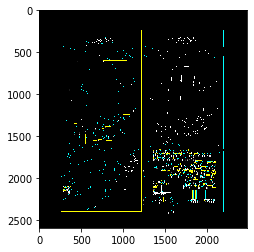

In [19]:
import cv2
from keras.preprocessing.image import img_to_array
import numpy as np
img=cv2.imread('../Box_detection_2/images/764216_bag.jpg')
imagee=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

ret,img=cv2.threshold(img,180,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

k=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

img = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)
k1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)

img1=cv2.Canny(img,0,255,2)

contours, hierarchy = cv2.findContours(img1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

img2=cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
font = cv2.FONT_HERSHEY_SIMPLEX

img3=cv2.drawContours(img2, contours, -1, (0,255,255), 1)
image=[]
p=[]
list=['0','1','2','3','4','5','6','7','8','9']
for i in range(65,91):
    list.append(chr(i))
for i in range(97,123):
    list.append(chr(i))
print(list)
for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    if w>5 and h>5:
        
        img4=cv2.rectangle(img3,(x,y),(x+w,y+h),(255,255,0),1)     
        
        i=img3[y:y+h,x:x+w]
        i=cv2.resize(i,(50,50))
        i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
        i = i.astype("float") / 255.0
        
        ima = img_to_array(i)
        ima = np.expand_dims(ima, axis=0)
        pred = classifier.predict(ima)[0]
        #print(list[pred.argmax()],pred.max())
        img5=cv2.putText(img4,list[pred.argmax()],(x,y+h+20), font, 0.8 ,(255,255,255),2,cv2.LINE_AA)   
        p.append(list[pred.argmax()])
'''for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    if w>5 and h>5:
        img5=cv2.putText(img4,list[pred.argmax()],(x,y+h-35), font, 0.5,(255,255,255),2,cv2.LINE_AA)        
from PIL import Image, ImageTk 
#img5.show()'''
import matplotlib.pyplot as plt
plt.imshow(img5)
plt.savefig('TensorF.png')

   

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'

In [21]:
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) / 255.
    res = np.array(classifier.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt, sum(probs) / 5

In [27]:
import os
import tempfile
import subprocess

def ocr(path):
    temp = tempfile.NamedTemporaryFile(delete=False)

    process = subprocess.Popen(['tesseract', path, temp.name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    process.communicate()

    with open(temp.name + '.txt', 'r') as handle:
        contents = handle.read()

    os.remove(temp.name + '.txt')
    os.remove(temp.name)

    return contents

str = ocr('TensorFlowResult.png.png')
print(str)

In [28]:

import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open("TensorFlowResult.png") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(22)
im = im.convert('1')
im.save('test2.jpg')

text = pytesseract.image_to_string(Image.open('test2.jpg'))
print(text)

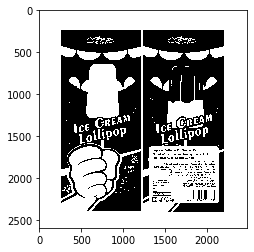

In [29]:
plt.imshow(img)


**We can see that it matches most of the words but sometimes give error in diiferentiation of capital and small letters.**

                          - - - - - - - - - - - - -- - - - - - - - - END- - - - - - - - - - - - - - - -- - - - - - - - - - - 

In [59]:
'''from keras.preprocessing.image import img_to_array
import numpy as np 
list=['s1','s2']
image = cv2.imread('../input/picture/main-qimg-03de963368e748a6fb7e399772b09c48-c')
print(type(image))
# pre-process the image for classification
image = cv2.resize(image, (50,50))
ima=image

image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
print(image.shape)

pred = classifier.predict(image)[0]
for i in range(2):
    if pred[i]>0.5:
        print(list[i],(pred[i]).astype('float32'))
    

print(pred)

#classifier.save('../input/model.h5')'''

'from keras.preprocessing.image import img_to_array\nimport numpy as np \nlist=[\'s1\',\'s2\']\nimage = cv2.imread(\'../input/picture/main-qimg-03de963368e748a6fb7e399772b09c48-c\')\nprint(type(image))\n# pre-process the image for classification\nimage = cv2.resize(image, (50,50))\nima=image\n\nimage = image.astype("float") / 255.0\nimage = img_to_array(image)\nimage = np.expand_dims(image, axis=0)\nprint(image.shape)\n\npred = classifier.predict(image)[0]\nfor i in range(2):\n    if pred[i]>0.5:\n        print(list[i],(pred[i]).astype(\'float32\'))\n    \n\nprint(pred)\n\n#classifier.save(\'../input/model.h5\')'

In [58]:
'''import cv2
print((ima.shape))

gray=cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/opencv-files/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
(x,y,w,h)=faces[0]
imm=gray[y:y+w, x:x+h]
print((gray.shape))
import matplotlib.pyplot as mat
mat.plot(imm)
cv2.waitKey()'''

"import cv2\nprint((ima.shape))\n\ngray=cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)\nface_cascade = cv2.CascadeClassifier('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/opencv-files/haarcascade_frontalface_alt.xml')\nfaces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)\n(x,y,w,h)=faces[0]\nimm=gray[y:y+w, x:x+h]\nprint((gray.shape))\nimport matplotlib.pyplot as mat\nmat.plot(imm)\ncv2.waitKey()"

In [57]:
'''import cv2
f=[]
l=[]
dir=sorted(list(os.listdir('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data')))
for i in dir:
    s=sorted(list(os.listdir('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data/'+i)))
    for j in s:
        print(i)
        k=cv2.imread('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data/'+i+'/'+j)
        gray=cv2.cvtColor(k,cv2.COLOR_BGR2GRAY)
        face_cascade=cv2.CascadeClassifier('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/opencv-files/lbpcascade_frontalface.xml')
        faces=face_cascade.detectMultiScale(gray,1.2,9)
        if len(faces)>0:
            (x,y,w,h)=faces[0]
            face=gray[y:y+h,x:x+w]
            f.append(face)
            label=i
            if label=='s1':
                l.append(1)
            else:
                l.append(0)'''

"import cv2\nf=[]\nl=[]\ndir=sorted(list(os.listdir('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data')))\nfor i in dir:\n    s=sorted(list(os.listdir('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data/'+i)))\n    for j in s:\n        print(i)\n        k=cv2.imread('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/training-data/'+i+'/'+j)\n        gray=cv2.cvtColor(k,cv2.COLOR_BGR2GRAY)\n        face_cascade=cv2.CascadeClassifier('../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/opencv-files/lbpcascade_frontalface.xml')\n        faces=face_cascade.detectMultiScale(gray,1.2,9)\n        if len(faces)>0:\n            (x,y,w,h)=faces[0]\n            face=gray[y:y+h,x:x+w]\n            f.append(face)\n            label=i\n            if label=='s1':\n                l.append(1)\n            else:\n                l.append(0)"

In [ ]:
'''face_rec=cv2.face.LBPHFaceRecognizer_create()
face_rec.train(f,np.array(l))
testimg='../input/repository/informramiz-opencv-face-recognition-python-0edc6e0/test-data/test1.jpg'
lab,conf=face_rec.predict(testimg)'''